In [1]:
import pandas as pd
import numpy as np
import random, os, sys 
from groo.groo import get_root
import matplotlib.pyplot as plt

os.path.join(get_root(".tasks_root"))

ids = ["XjK2mTp0", "vMe2FJk1", "cLr2qXf2"]

In [2]:
data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[0]+"_r3_main1_0.json"))
data2 = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[0]+"_r2_main2_0.json"))

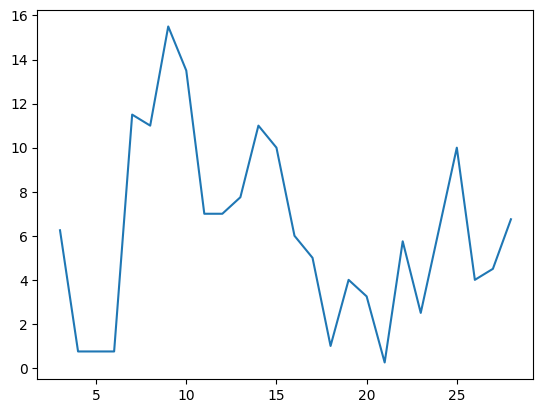

In [6]:
ii = 2
schid = 2
rdf = pd.DataFrame()
for cidx, c in enumerate(["r3", "r2"]):
    data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[ii]+"_"+c+"_main"+str(cidx+1)+"_"+str(schid)+".json"))
    rat = data.loc[(data["require_rating"]==1) & (data["decision"]==0),["target", "outcome", "t1_ev", "t2_ev", "rating", "t_slider_shown", "t_first_click_on_handle", "t_response_made"]]
    rat["initRT"]  = rat["t_first_click_on_handle"] - rat["t_slider_shown"]
    rat["totalRT"]  = rat["t_response_made"] - rat["t_slider_shown"]
    rat["delibrationRT"] = rat["initRT"]/rat["totalRT"] 

    rat["err"] = rat["outcome"] - rat["rating"]
    
    rdf = pd.concat([rdf, rat])
rdf["running_err"] = rdf["err"].rolling(4).mean().abs()
rdf= rdf.reset_index()
plt.plot(rdf.index, rdf["running_err"])

In [4]:
c = "r3"
cidx = 0
for ii in range(0,3):
    schid=ii
    data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[ii]+"_"+c+"_main"+str(cidx+1)+"_"+str(schid)+".json"))
    chdata = data.loc[(data["decision"]==1),["target", "outcome", "t1_ev", "t2_ev", "choice", "t_ch_targets_shown", "t_ch_choice_made"]]
    chdata["rt"] = chdata["t_ch_choice_made"] - chdata["t_ch_targets_shown"]
    chdata['correctch'] = chdata.apply(lambda row: 1 if row['t1_ev'] > row['t2_ev'] else 2, axis=1)

    # Compute accuracy
    chdata['accuracy'] = (chdata['correctch'] == chdata['choice']).astype(int)
    print(chdata['accuracy'].mean())

0.4117647058823529
0.5384615384615384
1.0


In [7]:
chdata

,target,outcome,t1_ev,t2_ev,choice,t_ch_targets_shown,t_ch_choice_made,rt,correctch,accuracy
31,2.0,6.0,-15.0,5.0,2.0,1335892.0,1338945.0,3053.0,2,1
34,1.0,25.0,25.0,-15.0,1.0,1368743.0,1371502.0,2759.0,1,1
38,1.0,-5.0,-5.0,15.0,2.0,1408051.0,1409275.0,1224.0,2,1
40,2.0,15.0,-5.0,15.0,2.0,1429276.0,1429994.0,718.0,2,1
45,2.0,-5.0,35.0,-5.0,1.0,1482018.0,1485551.0,3533.0,1,1
46,1.0,-13.0,-15.0,5.0,2.0,1493260.0,1496874.0,3614.0,2,1
48,2.0,-16.0,40.0,-20.0,1.0,1513293.0,1514617.0,1324.0,1,1
50,1.0,33.0,35.0,-5.0,1.0,1534984.0,1536760.0,1776.0,1,1
51,1.0,-14.0,-15.0,5.0,2.0,1544467.0,1546045.0,1578.0,2,1
54,1.0,-4.0,-5.0,15.0,2.0,1573760.0,1574742.0,982.0,2,1


In [ ]:
data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", "aaa2aaa2_r3_main1_2_test.json"))